<div style="direction:rtl;line-height:300%;font-family:BNazanin,">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر فاطمه لشکری
</font>
<p></p>
<br>
<font>
<b>فاز اول پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۸ آبان ۱۴۰۰
<br>
<font size=4.8>
دستیاران آموزشی مربوط به این فاز: سینا کاظمی - پارسا اسکندر
</font>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<h2>
مقدمه
</h2>
<p>
هدف فاز اول پروژه پیاده سازی یک سیستم بازیابی اطلاعات است.
این فاز پروژه از ۴ مرحله تشکیل شده است.
بخش اول به پیش پردازش متنی داده ها می پردازد که شامل نرمال سازی متن (Normalization) ، جداسازی لغات (Tokenization) ، حذف لغات پرتکرار و ... می باشد. بخش دوم مربوط به نمایه سازی (indexing) خواهد بود. در بخش سوم باید روی این نمایه فشرده سازی صورت بگیرد. در بخش چهارم باید پرسمان ورودی کاربر را تصحیح کنید.
</p>
<p>
۲ سری مجموعه دادگان در اختیار شما قرار گرفته است که یکی مربوط به زبان فارسی ( persian_dataset.csv ) و دیگری مربوط به زبان انگلیسی ( english_dataset.csv ) می باشد.
مجموعه فارسی بخشی از مستندات ویکی پدیای فارسی می باشد و مجموعه انگلیسی مربوط به اخبار است.
</p>

</div>

<div dir="rtl">
<h2>
بخش اول ( پیش پردازش اولیه متن )
</h2>
<p>
در این بخش از پروژه باید ابتدا مجموعه فایل هایی که در اختیارتان قرار گرفته است را بخوانید، برای خواندن و کار کردن با فایل‌ها پیشنهاد می‌شود از کتابخانه‌ی 
<a href="https://pandas.pydata.org/">
pandas
</a> 
استفاده کنید.
این کتابخانه توابعی برای 
<a href="https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/">
خواندن
</a> 
و 
<a href="https://towardsdatascience.com/pandas-dataframe-basics-3c16eb35c4f3">
کار کردن
</a> 
راحت‌تر با دیتاها در اختیار شما قرار می‌دهد .


 سپس به ترتیب مراحل پیش پردازش متنی که در ادامه آمده است را روی آنها اعمال کنید. برای کار های پیش رو می توانید از کتابخانه های 
<a href="https://www.nltk.org/">
NLTK
</a>
 برای زبان انگلیسی و هضم ( 
   <a href="http://www.sobhe.ir/hazm/">
hazm
</a> 
 ) برای زبان فارسی استفاده کنید
</p>
<ul>
<li>
نرمال سازی متنی (normalization): برای یکسان سازی متون می توانید از توابع معرفی شده استفاده کنید. اما در صورتی که میخواهید خودتان پیاده سازی کنید باید پیاده 
سازیتان شامل برگرداندن لغات به ریشه (stemming)
، case folding ( برای یکسان سازی متون انگلیسی ) و بقیه موارد مطرح شده در درس باشد.
</li>
<li>
جداسازی (tokenization): برای اینکار میتوانید از کتابخانه های معرفی شده در بالا استفاده نمایید
</li>
<li>
حذف علائم نگارشی: هر متنی در هر زبانی یه سری علائم نگارشی دارد که می بایست حذف شوند مانند: ویرگول ، دونقطه و ...
</li>
<li>
یافتن و حذف لغات پرتکرار (stopwords): در این بخش، حذف درصد معقولی از لغات پرتکرار مورد نظر است. برای این منظور لازم است تا همه متن را پردازش کنید و نسبت به حجم متن، کلماتی که پرتکرار هستند را نمایش دهید. این نسبت را طوری در نظر بگیرید که کلمات پرتکرار به دست آمده تا حد خوبی منطقی و کافی باشند.
</li>
<li>
برگرداندن کلمات به ریشه (stemming, lemmatizing): در نهایت کلمات را به حالت ساده و پایه آنها تبدیل کنید.
</li>
</ul>
<p>
برای پیاده سازی این بخش تابع پیاده سازی prepare_text را پر کنید.
برای نمایش لغات پرتکرار می توانید از هیستوگرام و یا لیست ساده ای از کلمات استفاده کنید.
</p>
</div>

# Prerequisite

Colab link: https://colab.research.google.com/drive/1vFlN-hhMYCxSKdSLXIdeWmPMzMzcQl41?usp=sharing

In [ ]:
colab = True
# if you are using google colab, create a directory named MIR in your 
# drive containing english_dataset.csv and persian_dataset.csv

In [ ]:
base_dir = ''
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    base_dir = '/content/drive/MyDrive/MIR/'

Mounted at /content/drive


Install Libraries

In [ ]:
!pip install nltk
!pip install hazm
!pip install PersianStemmer
!pip install parsivar
!pip install arabic-reshaper
!pip install python-bidi
!pip install unary_coding
!pip install bitstring
!pip install pandas
!pip install matplotlib

     |████████████████████████████████| 316 kB 3.8 MB/s 
     |████████████████████████████████| 233 kB 40.8 MB/s 
     |████████████████████████████████| 1.4 MB 19.1 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=5f0217e161d7ab36cf24e819d9b856fbcb9554b4678ca7e02a1755b2aec3ebc3
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154788 sha256=45ee8665d368a9410d56e35453d20eeb162ffd7cf897946bd957a8f7694ab857
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 810 kB 4.1 MB/s 
  Created wheel for PersianStemmer: filename=PersianStemmer-1.0.

File Reading & Imports


In [ ]:
import pickle
import string
import nltk
import os
import pandas as pd
import parsivar as prv
from unary_coding import unary, inverted_unary
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from PersianStemmer import PersianStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import RegexpTokenizer
from __future__ import unicode_literals
from hazm import *
import matplotlib.pyplot as plt

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')

farsi_txt_all = pd.read_csv(base_dir + "persian_dataset.csv")
farsi_txt_all.columns = ['title','text']
farsi_txt = farsi_txt_all
# farsi_txt = farsi_txt_all[:100]

english_txt_all = pd.read_csv(base_dir + "english_dataset.csv")
english_txt = english_txt_all
# english_txt = english_txt_all[:100]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
print(farsi_txt.info())
print(english_txt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   15000 non-null  object
 1   text    15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
dtypes: int64(1), object(2)
memory usage: 148.6+ KB
None


In [ ]:
debug = False
def dprint(*args):
    if debug:
        print(*args, sep="\n")

# Pre-Process Class


In [ ]:
import abc

class Preprocessor(abc.ABC):
    def __init__(self, text_df):
        self.text_df = text_df
        self.punctuation = string.punctuation + "‘’“”–‹›°؟،؛»«"
        self.stop_words = []

    def _remove_punctuation_from_word(self, punctuation, word):
        return ''.join([c for c in word if c != punctuation])

    @abc.abstractmethod
    def basic_text_preprocess(self, raw_text, normalize=True,
                                             remove_punctuation=True,
                                             stem=True,
                                             lemmatize=True):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization

        Parameters
        ----------
        raw_text : df column (pandas.core.series.Series)

        Returns
        -------
        df column
            Tokenized pandas dataframe
        """
        pass

    def get_words_frequency(self, limit=50):
        """Return top `limit` words with most frequency 

        Returns
        -------
        list of tuple
            A list of tuples containing tokens and their frequencies
        """

        print("preprocessing title tokens...")
        title_tokens = self.basic_text_preprocess(self.text_df['title'])

        print("preprocessing context tokens...")
        context_tokens = self.basic_text_preprocess(self.text_df['text'])

        print("preprocessing done.")

        all_tokens = pd.concat([title_tokens, context_tokens])

        # find frequency
        freq = nltk.FreqDist()
        all_tokens.apply(lambda text: freq.update(nltk.FreqDist(w for w in text)))

        freqs = freq.most_common()[:limit]

        plt.rcParams['figure.figsize'] = [25, 5]

        labels, values = list(zip(*freqs))
        labels = [get_display(reshape(label)) for label in labels]
        plt.bar(labels, values)
        plt.xticks(rotation=70)
        plt.show()

        return freqs[:limit]


    def get_and_set_stop_words(self, words_frequencies, limit):
        """Return stop words

        Returns
        -------
        dict
            A dictionary of stop words and their frequencies
        """

        most_common = words_frequencies[:limit]
        most_common_dict = {word:freq for word, freq in most_common}
        self.stop_words = most_common_dict.keys()

        return most_common_dict


    def prepare_text(self, raw_text, normalize=True,
                                     remove_punctuation=True,
                                     stem=True,
                                     lemmatize=True,
                                     remove_stop_words=True):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization and removing stop words

        Parameters
        ----------
        raw_text : str/pandas.core.series.Series

        Returns
        -------
        list
            A list of tokens
        """
        if (type(raw_text) == str):
            raw_text = pd.DataFrame([raw_text], columns=['text'])['text']

        processed_tokens = self.basic_text_preprocess(raw_text, 
                                                      normalize=normalize,
                                                      remove_punctuation=remove_punctuation,
                                                      stem=stem,
                                                      lemmatize=lemmatize)[0]
        
        if remove_stop_words:
            # remove stop words
            processed_tokens = [token for token in processed_tokens if token not in self.stop_words]

        return processed_tokens

## English Pre-Process

In [ ]:
class EnglishPreprocessor(Preprocessor):
    def _get_wordnet_pos(self, word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                  "N": wordnet.NOUN,
                  "V": wordnet.VERB,
                  "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    def _stem_text(self, stemmer, vocab, text):
        tokens = []
        for word in text:
            stemmed = stemmer.stem(word)
            if stemmed in vocab:
                tokens.append(stemmed)
            else:
                tokens.append(word)
        return tokens

    def basic_text_preprocess(self, raw_text, normalize=True,
                                             remove_punctuation=True,
                                             stem=True,
                                             lemmatize=True):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization

        Parameters
        ----------
        raw_text : df column (pandas.core.series.Series)

        Returns
        -------
        df column
            Tokenized pandas dataframe
        """
        dprint("raw_text:", raw_text)
                
        # normalization
        if normalize:
            text = raw_text.str.lower()
            dprint("normalized_text:", text)
        else:
            text = raw_text

        # tokenization
        text_tokens = text.apply(word_tokenize)
        dprint("after tokenization:", text_tokens)

        # delete punctuation
        if remove_punctuation:
            for p in self.punctuation:
                text_tokens = text_tokens.apply(lambda text: [self._remove_punctuation_from_word(p, word) for word in text])
            text_tokens = text_tokens.apply(lambda text: [word for word in text if word != ''])
            dprint("after deleting punctuation:", text_tokens)

        #stemming
        if stem:
            stemmer = LancasterStemmer()
            vocab = set(words.words())
            text_tokens = text_tokens.apply(lambda text: self._stem_text(stemmer, vocab, text))
            dprint("after stemming:", text_tokens)

        #lemmatizing
        if lemmatize:
            lemmatizer = WordNetLemmatizer()
            text_tokens = text_tokens.apply(lambda text: [lemmatizer.lemmatize(y, self._get_wordnet_pos(y)) for y in text])
            dprint("after lemmatizing:", text_tokens)

        return text_tokens


preprocessing title tokens...
preprocessing context tokens...
preprocessing done.


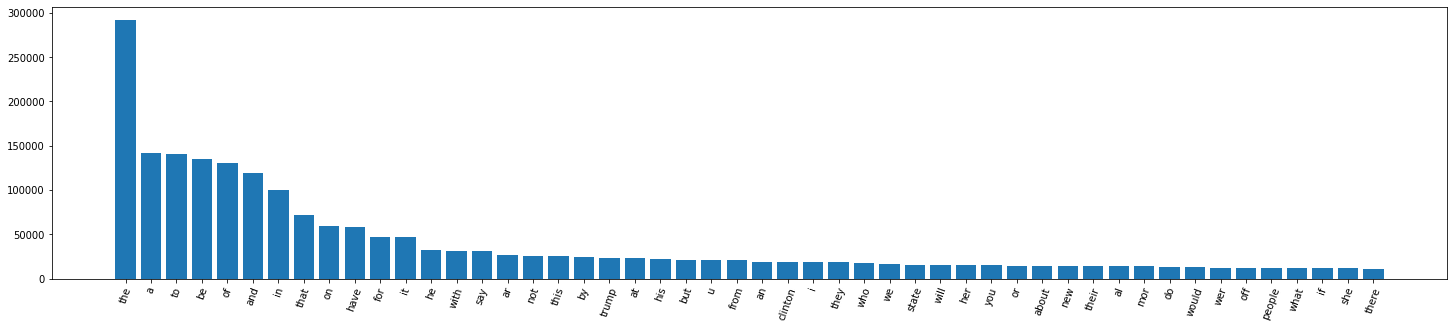

In [ ]:
english_preprocessor = EnglishPreprocessor(english_txt)
english_words_frequencies = english_preprocessor.get_words_frequency()

In [ ]:
english_stop_words_limit = 12
english_stop_words = english_preprocessor.get_and_set_stop_words(english_words_frequencies, english_stop_words_limit)
print("english_stop_words:", english_stop_words)

english_stop_words: {'the': 292311, 'a': 141843, 'to': 140708, 'be': 134696, 'of': 130427, 'and': 119693, 'in': 99626, 'that': 72245, 'on': 59318, 'have': 58270, 'for': 47326, 'it': 46528}


## Persian Pre-Process

In [ ]:
class PersianPreprocessor(Preprocessor):
    def basic_text_preprocess(self, raw_text, normalize=True,
                                             remove_punctuation=True,
                                             stem=True,
                                             lemmatize=True):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization

        Parameters
        ----------
        raw_text : df column (pandas.core.series.Series)

        Returns
        -------
        df column
            Tokenized pandas dataframe
        """

        # normalize
        if normalize:
            normalizer = prv.Normalizer(statistical_space_correction=True)
            text = raw_text.apply(normalizer.normalize)
            dprint("normalized_text:", text)
        else:
            text = raw_text

        # tokenize
        text_tokens = text.apply(word_tokenize)
        dprint("after tokenization:", text_tokens)

        #delete punctuation
        if remove_punctuation:
            for p in self.punctuation:
                text_tokens = text_tokens.apply(lambda text: [self._remove_punctuation_from_word(p, word) for word in text])
            text_tokens = text_tokens.apply(lambda text: [word for word in text if word != ''])
            dprint("after deleting punctuation:", text_tokens)

        #lemmatizing
        if lemmatize:
            lemmatizer = Lemmatizer()
            text_tokens = text_tokens.apply(
                    lambda text: [lemmatizer.lemmatize(w) for w in text])
            dprint("after lemmatizing:", text_tokens)

        #stemming
        if stem:
            ps = PersianStemmer()
            text_tokens = text_tokens.apply(
                    lambda text: [ps.run(w) for w in text])
            dprint("after stemming:", text_tokens)

        return text_tokens


preprocessing title tokens...
preprocessing context tokens...
preprocessing done.


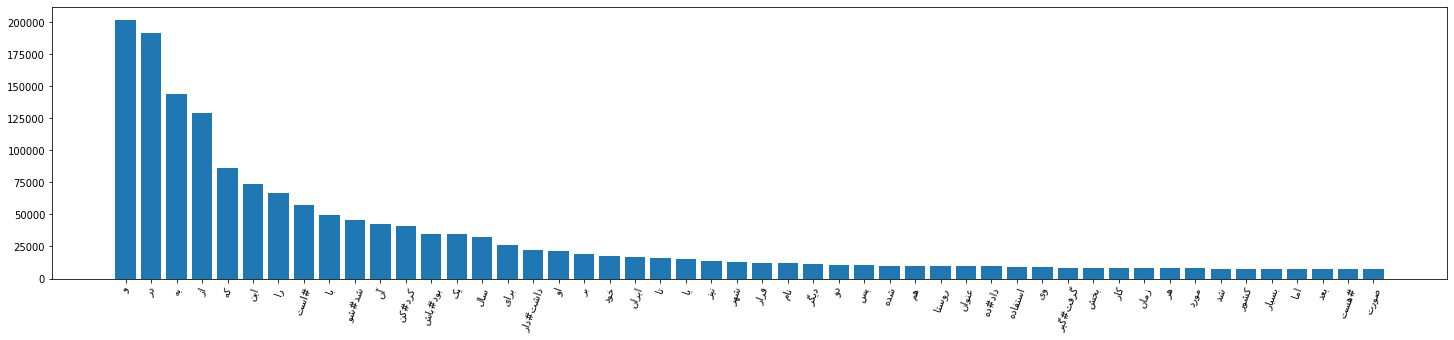

In [ ]:
persian_preprocessor = PersianPreprocessor(farsi_txt)
persian_words_frequencies = persian_preprocessor.get_words_frequency()

In [ ]:
persian_stop_words_limit = 20
persian_stop_words = persian_preprocessor.get_and_set_stop_words(persian_words_frequencies, persian_stop_words_limit)
print("persian_stop_words:", persian_stop_words)

persian_stop_words: {'و': 202082, 'در': 191310, 'به': 143895, 'از': 129128, 'که': 86544, 'این': 73642, 'را': 67132, '#است': 57753, 'با': 49885, 'شد#شو': 45540, 'آن': 42506, 'کرد#کن': 41331, 'بود#باش': 34979, 'یک': 34739, 'سال': 32127, 'برای': 25835, 'داشت#دار': 22458, 'او': 21527, 'بر': 18821, 'خود': 17445}


<div dir="rtl">
<h2>
توضیحات بخش اول
</h2>
<p>
برای این بخش ما سه کلاس را پیاده‌سازی کردیم. Preprocessor و Persian Preprocessor و English Preprocessor.
<p>
<div1 dir="ltr">

```
Preprocessor
```
</div1>
در این کلاس تمامی توابع لازم برای آماده‌سازی متن قرار داده‌شده‌اند و دو کلاس دیگر از این کلاس ارث‌بری می‌کنند. در ادامه توابع آن را توضیح می‌دهیم:
<p>
<li>
_remove_punctuation_from_word :   این تابع علائم نگارشی انگلیسی و فارسی را از متن حذف می‌کند.
</li>
<li>
basic_text_preprocess : از آنجایی که این تابع در بین پیش‌پردازنده فارسی و انگلیسی تفاوت دارد، در اینجا خالی است و هدف از تعریف آن فقط این بوده که هردو کلاس آن را به ارث ببرند.
</li>
<li>
get_words_frequency : در این تابع ابتدا تمامی عنوان‌ها و متن‌ها tokenize می‌شوند و در یک دیتافریم قرار می‌گیرند. پس آز آن تابع فرکانس کلمات را محاسبه کرده و هیستوگرام آن‌ها را می‌کشد. این کار به این منظور است که بتوانیم تصمیم بگیریم که چه تعدادی از کلمات پرتکرار را از متن‌مان حذف کنیم. طبق شکل اینجا برای متن‌های انگلیسی ۱۲ کلمه‌ی اول و برای متن فارسی ۲۰ کلمه‌ی اول را حذف می‌کنیم.
</li>
<li>
get_and_set_stop_words : در این تابع، محدودیت‌ تعداد stopwordها را مشخص می‌کنیم و تابع get_words_frequency را با آن تعداد صدا می‌زنیم.
</li>
<li>
prepare_text : این تابع به این منظور زده‌شده‌است که در صورتی که ورودی‌مان به‌جای آرایه، به شکل یک رشته بود، آن رشته را نیز به صورت دیتافریم در آورده و تابع basic_text_preprocess را روی آن صدا کرده تا عملیات‌‌های لازم را انجام دهد و در انتها هم stopwordها را از متن پاک کند. به این منظور این مرحله را آخر انجام می‌دهیم چون برای پیدا کردن stopword ها نیاز است که روی آن‌ها نیز عملیات basic_prepare_text انجام شود و متن پردازش شود.
<p>
<div1 dir="ltr">

```
English Preprocessor
```
</div1>

<p> 
همانطور که در قسمت قبلی نیز گفتیم، این کلاس یک تابع basic_text_preprocess دارد که در آن به ترتیب عملیات‌های normalization ، tokenization، حذف علائم نگارشی، stemming و lemmization انجام می‌شوند.
برای stemming از Lancaster استفاده می‌کنیم. در این مرحله برای 
 دقت بیشتر، درصورتیکه با stem کردن به یک کلمه‌ی معنادار نرسیده‌بودیم، کلمه را بدون تغییر نگه می‌داریم.
همچنین برای بخش lemmization، از position tagging  استفاده می‌کنیم. این تابع بررسی می‌کند که نقش هر کلمه در جمله‌مان چیست و با توجه به آن نقش lemmization را انجام می‌دهد.
<p> 
<div1 dir="ltr">

```
Persian Preprocessor
```
</div1>
<p> 
در این کلاس نیز تمامی عملیات‌ها را به ترتیب گفته‌شده در بالا هستند و تنها تفاوت این است که ابتدا lemmization را انجام می‌دهیم و بعد stemming که اینکار برای  بیشتر شدن دقت است. برای stemming از PersianStemmer، برای نرمال‌سازی از parsavir و برای lemmization از hazm استفاده کردیم.
</p>
</div>

<div dir="rtl">
<h2>
بخش دوم ( نمایه سازی )
</h2>
<p>
در این بخش پیاده سازی نمایه جایگاهی (Positional) و نمایه Bigram مطلوب است. برای نمایه جایگاهی باید به ازای هر لغت، لیستی از اسناد شامل آن لغت و جایگاه (ها) هر لغت در آن سند داشته باشید و برای نمایه Bigram نیز ترکیب های دوحرفی تمامی کلمات موجود در لغت نامه که این ترکیب در آنها موجود است را ذخیره کنید. این نمایه برای اصلاح پرسمان مورد استفاده قرار خواهد گرفت. نمایه شما باید پویا باشد یعنی با حذف سند از نمایه نیز حذف شود و با اضافه کردن سند یا اسناد در طول اجرای برنامه به نمایه اضافه شود. همچنین بعد از نمایه سازی باید قادر باشید نمایه را در فایلی ذخیره کرده و از آن بخوانید. پویا بودن نمایه و ذخیره سازی آن را برای هردو نوع نمایه در نظر بگیرید.
</p>
<p>
نکات پیاده سازی:
</br>
برای سادگی پیاده سازی برای هر کارکرد خواسته شده در توضیحات بالا یک تابع پیاده سازی کنید. برای مثال دوتابع برای حذف و اضافه سند به نمایه و توابعی برای ذخیره سازی و بارگزاری نمایه ها و ... در نظر بگیرید.
</p>

</div>

# Indexing

In [ ]:
class TermVocabulary:
    def __init__(self, preprocessor, text_df):
        self.vocab = {}
        self.preprocessor = preprocessor
        text_df.apply(lambda row : self.add_new_doc(row['title'] + " " + row['text']), axis=1)

    def get_tokens(self, text):
        return self.preprocessor.prepare_text(text, 
                                                normalize=True, 
                                                remove_punctuation=True,
                                                lemmatize=False,
                                                stem=False,
                                                remove_stop_words=False)
        
    def add_new_doc(self, text):
        tokens = self.get_tokens(text)
        for token in tokens:
            if token not in self.vocab:
                self.vocab[token] = 0
            self.vocab[token] += 1
    
    def remove_doc(self, text):
        tokens = self.get_tokens(text)
        for token in tokens:
            if token not in self.vocab:
                raise Exception()
            self.vocab[token] -= 1
            if self.vocab[token] == 0:
                del self.vocab[token]

    def exist(self, term):
        return term in self.vocab

In [ ]:
english_vocab = TermVocabulary(english_preprocessor, english_txt)
persian_vocab = TermVocabulary(persian_preprocessor, farsi_txt)

In [ ]:
print(english_vocab.exist('hello'), english_vocab.exist('helto'))
print(english_vocab.exist('رفتیم'), english_vocab.exist('رقتیم'))

True False
False False


## Positional Index

In [ ]:
class TermInDocPositionalInfo:
    def __init__(self):
        self.frequency = 0
        self.positions = []


class TermPositionalInfo:
    def __init__(self):
        self.total_frequency = 0
        self.docs_list = {}


class PositionalIndexDictionary():
    def __init__(self, preprocessor):
        self.terms_dictionary = {}
        self.preprocessor = preprocessor

    def print(self, start=0, end=10):
        for term, term_info in list(self.terms_dictionary.items())[start: end]:
            print(f"\n\"{term}\":")
            print(f"total frequency: {term_info.total_frequency}")
            for doc_id, doc_info in term_info.docs_list.items():
                print(f"\t{doc_id},{doc_info.frequency}", doc_info.positions)

    def add_new_doc(self, doc_id, raw_text):
        """Add new doc terms to dictionary

        Parameters
        ----------
        doc_id: doc_id
        raw_text : str

        """

        terms = self.preprocessor.prepare_text(raw_text)
        for pos, term in enumerate(terms):
            # add term to dictionary if not exist
            if term not in self.terms_dictionary:
                self.terms_dictionary[term] = TermPositionalInfo()

            # add doc to term info dictionary if not exist
            if doc_id not in self.terms_dictionary[term].docs_list:
                self.terms_dictionary[term].docs_list[doc_id] = TermInDocPositionalInfo(
                )

            # update term statistic
            term_info = self.terms_dictionary[term]
            term_info.total_frequency += 1
            term_info.docs_list[doc_id].frequency += 1

            # add position to list
            term_info.docs_list[doc_id].positions.append(pos)

    def remove_doc(self, doc_id, raw_text):
        """Remove doc terms from dictionary

        Parameters
        ----------
        doc_id: doc_id
        raw_text : str

        """

        terms = prepare_text(raw_text)
        for pos, term in enumerate(terms):
            if term not in self.terms_dictionary:
                raise Exception()

            if doc_id not in self.terms_dictionary[term].docs_list:
                raise Exception()

            # update term statistic
            term_info = self.terms_dictionary[term]
            term_info.total_frequency -= 1
            term_info.docs_list[doc_id].frequency -= 1

            # remove position from list
            term_info.docs_list[doc_id].positions.remove(pos)

    def get_gaps(self):
        docs = {}
        gaps = {}
        for term, term_info in self.terms_dictionary.items():
            docs[term] = []
            for doc_id, doc_info in term_info.docs_list.items():
                docs[term].append(doc_id)
            docs[term] = sorted(docs[term])
            docs[term].insert(0, 0)
            
            gaps[term] = [docs[term][i]-docs[term][i-1]
                          for i in range(1, len(docs[term]))]
        return gaps


In [ ]:
def create_positional_index(preprocessor, text_df):
    """Creates the bigram index for spell correction"""
    b = PositionalIndexDictionary(preprocessor)
    text_df.apply(lambda row : b.add_new_doc(row.name, row['title'] + " " + row['text']), axis=1)
    return b

In [ ]:
english_positional_index = create_positional_index(english_preprocessor, english_txt)
english_positional_index.print(start=0, end=5)

In [ ]:
persian_positional_index = create_positional_index(persian_preprocessor, farsi_txt)
persian_positional_index.print(start=0, end=5)

KeyboardInterrupt: ignored

## Bigram Index

In [ ]:
class BigramInfo:
    def __init__(self):
        self.terms = {}


class BigramIndexDictionary():
    def __init__(self, preprocessor, must_prepare_text=False):
        self.bigram_dictionary = {}
        self.preprocessor = preprocessor
        self.must_prepare_text = must_prepare_text

    @property
    def flat_bigram_dictionary(self):
        flat_dict = {key: [term for term in val.terms.keys()] for key, val in self.bigram_dictionary.items()}
        return flat_dict

    def print(self, start=0, end=10):
        for bigram, info in list(self.bigram_dictionary.items())[start: end]:
            print(f"\n\"{bigram}\":")
            for term, freq in info.terms.items():
                print(f"({term},{freq})", end=" ")

                
    def get_tokens(self, text):
        return self.preprocessor.prepare_text(text, 
                                                normalize=True, 
                                                remove_punctuation=True,
                                                lemmatize=False,
                                                stem=False,
                                                remove_stop_words=False)
    
    def add_new_doc(self, raw_text):
        """Add new doc terms to dictionary

        Parameters
        ----------
        raw_text : str

        """
        terms = self.get_tokens(raw_text)
            
        for term in terms:
            augmented_term = "$" + term + "$"
            for i in range(len(augmented_term) - 1):
                bigram = augmented_term[i:i + 2]

                # add bigram to dictionary if not exist
                if bigram not in self.bigram_dictionary:
                    self.bigram_dictionary[bigram] = BigramInfo()

                # add term to bigram list if not exist
                if term not in self.bigram_dictionary[bigram].terms:
                    self.bigram_dictionary[bigram].terms[term] = 0

                # update term statistic
                self.bigram_dictionary[bigram].terms[term] += 1

                # print(bigram, term)
                # self.print(start=0, end=2)

        
    def remove_doc(self, raw_text):
        """Remove doc terms from dictionary

        Parameters
        ----------
        raw_text : str

        """

        terms = self.get_tokens(raw_text)
        
        for term in terms:
            augmented_term = "$" + term + "$"
            for i in range(len(augmented_term) - 1):
                bigram = augmented_term[i:i + 2]

                if bigram not in self.bigram_dictionary:
                    raise Exception()

                # add term to bigram list if not exist
                if term not in self.bigram_dictionary[bigram].terms:
                    raise Exception()

                # update term statistic
                self.bigram_dictionary[bigram].terms[term] -= 1
                if self.bigram_dictionary[bigram].terms[term] == 0:
                    del self.bigram_dictionary[bigram].terms[term]

    def get_gaps(self):
        docs = {}
        gaps = {}
        for term, term_info in self.bigram_dictionary.items():
            docs[term] = set()
            for vocab, doc_id in term_info.terms.items():
                docs[term].add(doc_id)
            docs[term] = list(sorted(docs[term]))
            docs[term].insert(0, 0)
            
            gaps[term] = [docs[term][i]-docs[term][i-1]
                          for i in range(1, len(docs[term]))]
        return gaps


    def get_bigrams(self, term):
        augmented_term = "$" + ''.join(self.get_tokens(term)) + "$"
        dprint(term, augmented_term)
        bigrams = [augmented_term[i:i + 2] for i in range(len(augmented_term) - 1)]
        return bigrams
      
    def get_bigrams_count(self, term):
        return len(self.get_bigrams(term))
    
    def get_terms_with_common_bigrams(self, query, minimum_common_bigrams = 1):
        query_bigrams = self.get_bigrams(query)
        terms = {}
        for bigram in query_bigrams:
            if bigram not in self.bigram_dictionary:
                continue
            bigram_term_list = self.bigram_dictionary[bigram].terms
            for term in bigram_term_list:
                if term not in terms:
                    terms[term] = 0
                terms[term] += 1

        return {term:count for term,count in terms.items() if count >= minimum_common_bigrams}
   

In [ ]:
def create_bigram_index(preprocessor, text_df):
    """Creates the bigram index for spell correction"""
    b = BigramIndexDictionary(preprocessor)
    text_df.apply(lambda row : b.add_new_doc(row['title'] + " " + row['text']), axis=1)

    return b

In [ ]:
english_bigram_index = create_bigram_index(english_preprocessor, english_txt)
english_bigram_index.print(start=0, end=5)


"$y":
(you,204) (york,51) (your,79) (years,65) (yvoe,1) (yet,27) (young,16) (year,40) (yelled,1) (yusor,1) (yale,6) (yearold,11) (yales,2) (youngsters,1) (yeah,3) (youtube,15) (yes,12) (yahoos,1) (youre,13) (yourselves,1) (yourself,6) (yue,3) (youve,2) (ypg,3) (youll,5) (york—in,1) (yemen,4) (years,1) (yuval,1) (yellenled,1) (yields,1) (yellen,2) (y,3) (year—and,1) (yank,1) (yeti,1) (youngster,1) (yorks,2) (ying,4) (yang,4) (yuan,1) (younger,1) (yard,5) (youth,3) (yusufiy,1) (yearwill,1) (yorktowashington,1) (york daily,1) (yorkbased,1) (yazidis,17) (yazidi,10) (yukawa,2) (yaakov,1) (yemenis,1) (yield,1) (yezidi,1) (youd,1) (yesterday,1) (yelling,2) (yesmen,1) 
"yo":
(you,204) (york,51) (everyone,24) (your,79) (cokhyouusrfs,1) (young,16) (anyone,13) (youngsters,1) (youtube,15) (ayotte,11) (ayottes,1) (youre,13) (beyond…,1) (yourselves,1) (mayor,7) (hall mayor,1) (yourself,6) (beyond,9) (youve,2) (youll,5) (york—in,1) (youngster,1) (yorks,2) (younger,1) ( you,1) (youth,3) (fightersyou

In [ ]:
persian_bigram_index = create_bigram_index(persian_preprocessor, farsi_txt)
persian_bigram_index.print(start=0, end=5)


"$ر":
(رفتار,22) (روی,77) (رفته,1) (روانشناسی,7) (را,613) (روانی,3) (رفتارهای,2) (رفتاری,4) (رویه,2) (رفتارها,1) (روشی,2) (رفتارگرایی,2) (روانکاوی,1) (روز,14) (رازهای,1) (روابط,4) (روش,4) (رقابت,7) (راتسهیل,1) (راتقلید,1) (راه,36) (رضا,3) (رغبت,1) (راضی‌کننده,1) (رفتارشان,1) (رتبه,6) (رسیدن,4) (رفیع,1) (راحت‌تر‌باکسی‌دعواکنید,1) (روش‌های,2) (راحتی,3) (رضایت,4) (رشتهٔ,1) (روستاهای,9) (رفت,11) (رشته,8) (رومیان,1) (راست,13) (رابطه,19) (راست‌همنهشتی,4) (رابطه‌formula,1) (رده‌ای,1) (ریانووستی,2) (روسیه,6) (ریا,2) (روسی,3) (روزنامه‌نگاران,2) (روزنامه‌های,3) (راننده,2) (رسید,16) (رساندن,3) (روایت,2) (روزنامه,5) (راستی,1) (روزنامه‌نگاری,2) (رسانده‌اند,1) (رفسنجانی,3) (روزنامه‌ها,2) (رنسانس,1) (رنگرز,3) (روزی,2) (رنگ‌آمیزی,1) (رسانایی,1) (روستایی,6) (روستا,24) (راهبردی,1) (روحانیت,3) (روستای,32) (روایات,1) (روح,2) (رهایی,1) (رژیم,5) (رجال,2) (رحیم‌خبازباشی,1) (رویدادهای,1) (ریاست,10) (راستا,2) (رحلت,2) (رسیدهاست,6) (رونق,2) (روحانیان,1) (رضاشاه,1) (روحانیانی,1) (رسیدهبود,3) (رسمی,3) (ریاست‌جمه

<div dir="rtl">
<h2>
توضیحات بخش دوم
</h2>
<p>
این بخش به دو قسمت Positional Indexو Bigram Index تقسیم‌ می‌شود که هرکدام را جداگانه توضیح می‌دهیم. به‌جز این دو مورد یک کلاس TermVocabulary هم داریم که در ادامه معرفی می‌کنیم.
<p>
<div1 dir="ltr">

```
TermVocabulary Index 
```
</div1>
<p>
این کلاس لیستی از لغات را بدون stemming و lemmization و با استفاده از نوع پیش‌پردازنده‌ای که دریافت می‌کند، نگه می‌دارد. از خروجی این کلاس در قسمت bigram index استفاده می‌کنیم.
<p>
<div1 dir="ltr">

```
Positional Index 
```
</div1>
<p>
در اینجا کلاس اصلی ما PositionalIndexDictionary است که این کلاس یک پیش‌پردازنده و یک لغت‌نامه دارد.  پیش‌پردازنده را می‌توان از بین فارسی و انگلیسی انتخاب کرد.
در لغت‌نامه به ازای هر term غیرتکراری یک نمونه از کلاس TermPositionalInfo ساخته می‌شود .
کلاس TermPositionalInfo نیز درخود فرکانس کلی یک term را همراه با یک نمونه‌ی از کلاس TermInDocPositionalInfo نگه می‌دارد.
<p>
در نهایت کلاس TermInDocPositionalInfo شماره‌ی داک‌هایی که آن term در آن تکرار شده را همراه با فرکانس تکرار در هر سند و موقعیت‌اش ذخیره می‌کند.
<p>
کلاس PositionalIndexDictionary همچنین دو تابع برای اضافه و حذف کردن سندها و یک تابع برای به ‌دست آوردن gapها دارد که این تابع برای بخش سوم به کار می‌آید.
<p>
در تابع add_new_doc، ابتدا متن را پردازش می‌کنیم. پس از آن به ازای هر term ای که در آن سند قرار دارد، ابتدا چک می‌کنیم که از قبل در لغت‌نامه‌مان بوده‌است یا نه. در صورتیکه نبوده باشد برای آن دیکشنری‌ای می‌سازیم که شامل فرکانس کلی، شماره‌ی سندها تعداد تکرار در هر سند و موقعیت term در هر داک باشد.
اما در صورتیکه از قبل در لغت‌نامه وجود داشته، یک دیکشنری از نوع TermInDocPositionalInfo  برای آن درست می‌کنیم. فرکانس کلی کلمه را نیز آپدیت می‌کنیم.
<p>
در تابع remove_doc، ابتدا متن را پردازش می‌کنیم. سپس به ازای هر term ای بررسی می‌کنیم که ۱) آن term در لغت‌نامه‌مان بوده‌است و ۲) در دیکشنری مربوط به term، شماره‌ی سندی که می‌خواهیم آن را حذف کنیم وجود دارد. 
<p>
اگر هرکدام از شرط‌های بالا برقرار نبود، exception رخ می‌دهد.در غیر این صورت دیکشنری آن term را آپدیت کرده و فرکانس کلی اش را یکی کم می‌کنیم و همچنین در لیست سند‌هایش موقعیتش در آن سند را حذف می‌کنیم.
<p>
در تابع get_gaps هم فاصله‌ی بین هر دو سند متوالی که یک term در آن‌ها قرار دارد را به‌دست می‌آوریم تا بعدا در فشرده‌سازی از آن استفاده کنیم.
<p>
<div1 dir="ltr">

```
Bigram Index
```
</div1>
<p>
کلاس اصلی ما BigramIndexDictionary است که مانند بخش قبلی می‌توان برای آن نوع پیش‌پردازنده را مشخص کرد و یک لغت‌نامه نیز دارد. در لغت‌نامه به ازای هر bigram، کلمه‌ای که شامل آن است و شماره‌ی سندی که در آن قرار دارد را ذخیره می‌کنیم.
در تابع add_new_doc ابتدا متن را پردازش می‌کنیم. پس از آن هر ترم را به صورت $term$ می‌نویسیم و به ازای هر دو حرف متوالی‌اش، در سندها جستجو می‌کنیم. همانند بخش قبل درصورتیکه آن bigram از قبل وجودداشت، دیکشنری‌اش را به‌روز می‌کنیم و اگر وجود نداشت آن را به لغت‌نامه‌مان اضافه می‌کنیم. 
<p>
در کلاس remove_doc هم دوباره متن سندی را که می‌خواهیم حذف کنیم، پردازش می‌کنیم و برای هر term، bigramهایش را بررسی می‌کنیم. در صورتیکه در لفت‌نامه نبودند و یا در دیکشنری‌شان شماره‌ی آن سند موجود نبود، exception داده‌می‌شود. درغیراین‌صورت دیکشنری‌اش را آپدیت کرده و فرکانس را منهای یک می‌کنیم و همچنین آن سند را از بین سندهایی که بایگرم در آن قرار داشت، حذف می‌کنیم.
<p>
تابع get_gaps هم همانطوری که اشاره‌کردیم فاصله‌ی بین هر دو سند متوالی را که یک bigram در آن قرار دارد را به‌دست می‌آورد. (توجه داشته‌باشید که این سندها از ابتدا به ترتیب داک‌آیدی ذخیره شده‌اند.)
<p>
تابع get_bigrams یک term را ورودی گرفته و آرایه‌ای از تمام bigram‌هایش خروجی می‌دهد.
<p>
get_bigrams_count تعداد bigram‌های یک کلمه را برمی‌گرداند.
<p>
درنهایت تابع get_terms_with_common_bigrams که برای بخش چهارم استفاده‌می‌شود، یک کوئری را دریافت می‌کند و به ازای هر token اش bigramهای آن را محاسبه می‌کند. پس از آن به ازای هر term در کوئری‌مان بررسی می‌کند که کدام لغات موجود در لغت‌نامه بیش از یک bigram مشترک با آن term دارند. درنهایت از میان تمامی این termها آن‌هایی که دارای بیشترین تعداد bigram مشترک هستند را نگه می‌داریم. و از بین این termها آنی را انتخاب می‌کنیم که دارای کمترین edit distance باشد.
<p>
* توجه کنید که در این لغت‌نامه را با استفاده از همان کلاس TermVocabulary Index  که در ابتدا معرفی کرده‌بودیم، می‌سازیم. به‌طور کلی در این روش ما lemmization و stemming را انجام ندادیم تا نتایح بهتری دریافت بکنیم.
</p>

</div>

<div dir="rtl">
<h2>
بخش سوم ( فشرده سازی نمایه ها)
</h2>
در این بخش هدف، فشرده‌سازی نمایه‌های ساخته‌شده به دو روش 
variable code 
و
gamma code 
است.

<h3>
نکات پیاده‌سازی 
</h3>
 هر دو روش پیاده‌سازی شود ولی برای ذخیره‌سازی نمایه‌ها در فایل و استفاده‌ از آن در بخش‌های بعد یکی از دو روش به دلخواه استفاده شود.
 <br>
برای ذخیره نمایه در فایل می‌توانید از JSON 
یا
pickle 
استفاده کنید.
</div>


# Compression

<div dir="rtl">
<h1>توضیحات</h1>

برای پیاده‌سازی این بخش ابتدا در دو قسمت Variable Code و Gamme Code،  
توابع لازم برای تبدیل id داک‌‌ها به بایت را آماده سازی می‌کنیم و سپس توابع خواندن و نوشتن را وارد می‌کنیم.

\
از آنجایی که در هر دو روش VB و Gamma آرایه‌ای از اعداد به عنوان ورودی داده خواهد شد (آرایه gap)، توابع در این دو بخش باید بتوانند یک آرایه از اعداد را گرفته و پس از آماده‌کردن خروجی به شکل bytes، مجددا آن را به آرایه اولیه تبدیل کنند. دلیل استفاده از bytes نیز حجم کمتر آن نسبت به ذخیره‌سازی اعداد است.

\
<h2>
Variable Byte
</h2>
توابع پیاده سازی شده در این بخش عبارتند از:

<div1 dir="ltr">

```
VB_encode_number(n)
```
</div1>

در روش VB Encoding، برای هر عدد مقدار خاصی تولید می‌شود. بنابراین این تابع مقدار یک عدد را به عنوان ورودی می‌گیرد (int) و مقدار خروجی آن را به صورت bytes برمی‌گرداند.

<div1 dir="ltr">

```
ٰVB_decode_number(bytes_n)
```
</div1>

عملکرد این تابع معکوس تابع بالاست، یعنی با ورودی گرفتن bytes و با فرض اینکه مقدار ورودی به یک عدد اختصاص دارد، عدد مورد نظر را تولید می‌کند.

<div1 dir="ltr">

```
VB_encode_array(list_n)
```
</div1>

در این تابع، آرایه‌ای از اعداد به ورودی داده می‌شود و پس از انجام VB encoding برای هر یک از اعداد به طور جداگانه، bytes های خروجی آنها در کنار هم قرار می‌گیرند تا در نهایت یک خروجی تولید شود. 

<div1 dir="ltr">

```
VB_decode_array(bytes_n)
```
</div1>

با ورودی دادن bytesی که نشان‌دهنده یک آرایه از اعداد است، این تابع می‌تواند آرایه اولیه را بازگرداند


\
<h2>
Gamma
</h2>

در این بخش داریم:

<div1 dir="ltr">

```
bit_division(num)
```
</div1>

بر خلاف VB Encoding، در این روش مقدار نهایی تولید شده از کنار هم قرار گرفتن تمامی encodeها به‌دست می‌آید، و در پایان یک رشته باینری طولانی تولید می‌شود که امکان تبدیل مستقیم آن به bytes وجود ندارد. برای رفع این محدودیت، این تابع رشته باینری را به عنوان ورودی دریافت کرده و آن را ۸ بیت به ۸ بیت از سمت راست جدا می‌کند و اعداد تولید شده را در یک آرایه قرار داده و خروجی می‌دهد (تبدیل آرایه اعداد به bytes فرایندی بسیار ساده‌تر نسبت به بقیه تبدیل‌ها دارد). 

<div1 dir="ltr">

```
Gamma_encode(gap_ids)
```
</div1>

این تابع آرایه‌ای از اعداد را در ورودی دریافت می‌کند و رشته باینری مورد نیاز (Gamma_string) را تولید می‌کند. بعد از آماده شدن این رشته، از تابع قبلی استفاده می‌شود تا در نهایت خروجی bytes آماده باشد.

 از آنجایی که در هنگام decode کردن مقادیر گاما، اعداد ۰ و ۱ موجب ایجاد اختلال می‌شوند، تمامی مقادیر ورودی در این تابع ابتدا با ۲ جمع شده و سپس encode می‌شوند. این کار عملیات decode را نیز آسان‌تر خواهد کرد. 

<div1 dir="ltr">

```
Gamma_decode(bytes_n)
```
</div1>

در نهایت در تابع دیکود، مقدار ورودی داده‌شده به صورت bytes ابتدا به رشته گاما تبدیل می‌شود و سپس عملیات decode انجام می‌گیرد.

</div>



## Variable Code

In [ ]:
def VB_encode_number(n):
    """Converts a decimal number to VB code

    Parameters
    ----------
    n : int

    Returns
    ----------
    bytes(ints) : bytes

    """

    ints = []
    i = 0
    while True:
        ints.insert(0, (n % 128) + 128 * (i == 0))
        if n < 128:
            break
        n = n // 128
        i += 1
    return bytes(ints)


def VB_decode_number(bytes_n):
    """Converts VB code to decimal number

    Parameters
    ----------
    bytes_n : bytes

    Returns
    ----------
    decoded : int

    """

    list_n = [n for n in bytes_n]
    list_n[-1] -= 128

    decoded = list_n[0]
    for i in range(1, len(list_n)):
        decoded = decoded*128 + list_n[i]
    return decoded


def VB_encode_array(list_n):
    """Converts an array of decimal numbers to bytes

    Parameters
    ----------
    list_n : list[int]

    Returns
    ----------
    vb_code : bytes

    """

    vb_code = bytes(0)
    for n in list_n:
        vb_code += bytes(VB_encode_number(n))
    return vb_code


def VB_decode_array(bytes_n):
    """Converts a byte to an array of decimal numbers

    Parameters
    ----------
    list_n : bytes

    Returns
    ----------
    gaps : list[int]

    """

    gaps = []
    vb_code = bytes(0)
    for byte in bytes_n:
        vb_code += bytes([byte])
        if(byte.bit_length() == 8):
            gaps.append(VB_decode_number(vb_code))
            vb_code = bytes(0)
    return(gaps)


## Gamma Code


In [ ]:
def bit_division(num):
    string = str(bin(num)).replace('0b', '')
    subs = []
    i = len(string)
    while i > 0:
        subs.insert(0, int('0b'+string[(i-8) * ((i-8) > 0):i], base=0))
        i -= 8
    return subs


def Gamma_encode(gap_ids):
    """Converts a list of decimal number to Gamma code

    Parameters
    ----------
    gap_ids : list

    """

    gamma_codes = []
    for id in gap_ids:

        # compute offset
        binary_n = bin(id + 2)
        offset_string = str(binary_n)[3:]
        offset_size = len(offset_string)

        # compute length
        length = unary(offset_size)

        # compute gamma code
        gamma_string = str(length) + offset_string

        gamma_codes.append(gamma_string)

    gamma_codes_string = '0b'+''.join(gamma_codes)

    arr = bit_division(int(gamma_codes_string, base=0))

    return bytes(arr)


def Gamma_decode(bytes_n):
    """Decodes a string to decimal numbers

    Parameters
    ----------
    string_bin : string

    """
    string_bin = ''
    for i in bytes_n:
        string_bin += str(bin(i)).replace('0b',
                                          '').zfill(8 * (string_bin != ''))
    gaps = []
    j = 0

    while j < len(string_bin):
        count = 0
        while j < len(string_bin) and string_bin[j] == "1":
            count += 1
            j += 1
        offset = "1" + string_bin[j+1:j+count+1]
        offset_decimal = int(offset, 2)
        gaps.append(offset_decimal - 2)
        j = j + count + 1

    return gaps

# File Read & Write

<div dir="rtl">
<h1>توضیحات</h1>

در این بخش توابع لازم برای خواندن و نوشتن فایل‌ها پیاده‌سازی شده‌اند. از آنجایی که تمامی آرایه‌های gaps در هر دو روش encoding به bytes تبدیل شده بودند، امکان استفاده از json وجود نداشت و بنابراین فایل‌ها با pickle نوشته می‌شوند.


توابع پیاده سازی شده در این بخش عبارتند از:

<div1 dir="ltr">

```
gaps_to_docs(gaps)
```
</div1>

در هر دو روش فشرده‌سازی، مقادیر خوانده یا نوشته‌شده مربوط به فاصله میان داک‌ها و نه id  خود آنهاست، بنابراین این تابع پیاده‌سازی شده است تا با گرفتن آرایه gaps بتواند doc_id ها راتولید کند. 

<div1 dir="ltr">

```
switch_encode(compression_type, gaps)
store_index(dictionary, path, compression_type)
```
</div1>

در بخش write به دو تابع بالا نیاز داریم. تابع اول با ورودی گرفتن نوع فشرده‌سازی، encoding لازم را برای آرایه gap خروجی می‌دهد. در تابع پایین نیز یک dictionary از تمامی کلمات پردازش شده آماده می‌شود که در آن به ازای هر کلمه، آرایه gaps آن با روش فشرده‌سازی مورد نظر تغییر یافته و به bytes تبدیل شده است. پس از آماده شدن دیکشنری کافیست که در فایل مورد نظر ذخیره‌سازی شده و حجم آن نمایش داده شود. 

<div1 dir="ltr">

```
switch_decode(compression_type, gaps)
load_index(dictionary, path, compression_type)
```
</div1>

در بخش read نیز دو تابع آماده شده‌اند. تابع اول با دریافت bytes مربوط به آرایه gaps هر کلمه می‌تواند آرایه اولیه را با توجه به روش فشرده‌سازی مناسب خروجی دهد. تابع load_index نیز تمامی مقادیر خوانده شده از فایل را در دیکشنری قرار می‌دهد.

</div>

In [ ]:
def gaps_to_docs(gaps):
    docs = []
    docs.append(gaps[0])
    for i in range(len(gaps)-1):
        docs.append(docs[i] + gaps[i+1])
    return docs


print(gaps_to_docs([1, 2, 3, 4]))

[1, 3, 6, 10]


## File Write


In [ ]:
def switch_encode(compression_type, gaps):
    switcher = {
        'no-compression': gaps,
        'gamma-code': Gamma_encode(gaps),
        'variable-byte': VB_encode_array(gaps)
    }
    return switcher.get(compression_type)


def store_index(dictionary, path, compression_type):
    """Stores the index in a file

    Parameters
    ----------
    path : str
        Path to store the file

    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte

    Returns
    -------
    int
        The size of the stored file
    """

    data = {}
    data['terms'] = []
    for term, doc_ids in dictionary.get_gaps().items():
        data['terms'].append({
            'term': term,
            'gaps': switch_encode(compression_type, doc_ids)
        })

    with open(path, "wb") as f:
        f.write(pickle.dumps(data))

    return os.stat(path).st_size

In [ ]:
directory = base_dir

print("file size:", store_index(english_positional_index,
                                f"{directory}eng_vb.bnr", "variable-byte"))
print("file size:", store_index(english_positional_index,
                                f"{directory}eng_gc.bnr", "gamma-code"))
print("file size:", store_index(english_positional_index,
                                f"{directory}eng_no_cmp.bnr", "no-compression"))
print("file size:", store_index(persian_positional_index,
                                f"{directory}per_vb.bnr", "variable-byte"))
print("file size:", store_index(persian_positional_index,
                                f"{directory}per_gc.bnr", "gamma-code"))
print("file size:", store_index(persian_positional_index,
                                f"{directory}per_no_cmp.bnr", "no-compression"))


file size: 175759
file size: 171749
file size: 202722
file size: 173517
file size: 173710
file size: 185471


## File Read

In [ ]:
def switch_decode(compression_type, gaps):
    switcher = {
        'no-compression': gaps,
        'gamma-code': Gamma_decode(gaps),
        'variable-byte': VB_decode_array(gaps)
    }
    return switcher.get(compression_type)


def load_index(path, compression_type):
    """Loads the index from a file

    Parameters
    ----------
    path : str
        Path of the file to load from

    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte
    """
    with open(path, "rb") as f:
        data_file = f.read()
        data = pickle.loads(data_file)
        for term in data['terms']:
            term['decoded_gaps'] = switch_decode(
                compression_type, term['gaps'])
        return data


print(load_index(f"{base_dir}eng_no_cmp.bnr", "variable-byte"))
print(load_index(f"{base_dir}eng_vb.bnr", "variable-byte"))
print(load_index(f"{base_dir}eng_gc.bnr", "gamma-code"))

<div dir="rtl">
<h2>
بخش چهارم ( اصلاح پرسمان )
</h2>
در صورتی که پرسمان ورودی دارای غلط املایی باشد ( لغت‌ غلط لغتی است که در لغت‌نامه موجود نیست ) لازم است که با جست‌وجوی لغت‌های احتمالی و انتخاب بهترین لغت به ادامه‌ی جست‌وجو با پرسمان اصلاح‌شده پرداخته‌شود.
برای این‌کار لازم است ابتدا به وسیله‌ی روش bigram 
و معیار jaccard 
نزدیک‌ترین لغات به لغت با غلط املایی را پیدا کنید و سپس بهترین لغت میان آن‌ها را با استفاده از معیار 
edit distance 
بیابید.
<h3>
نکات پیاده‌سازی:
</h3>
یک تابع پیاده‌سازی شود که ورودی خام را گرفته و متن تصحیح شده‌ی آن‌را نمایش دهد. دقت کنید ورودی و خروجی هر دو رشته‌ی متنی هستند.
</br>
نیازی به ذخیره‌سازی و فشرده‌سازی نمایه بایگرم نیست. همچنین می‌توانید از کد آماده برای محاسبه edit distance استفاده کنید.
</div>

In [ ]:
def edit_distance(s1, s2):
    """Calculate edit distance between two strings s1 and s2

    Parameters
    ----------
    s1: str
    s2: str

    Returns
    -------
    int
        The edit distance
    """

    n = len(s1)+1
    m = len(s2)+1

    edit_distance_table = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        edit_distance_table[i][0] = i
    
    for j in range(m):
        edit_distance_table[0][j] = j

    for i in range(1, n):
        for j in range(1, m):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            edit_distance_table[i][j] = min(edit_distance_table[i-1][j] + 1,
                                            edit_distance_table[i][j-1] + 1,
                                            edit_distance_table[i-1][j-1] + cost)

    return edit_distance_table[n-1][m-1]
    
edit_distance('cats', 'fast')

3

In [ ]:
def get_corrected_text(preprocessor, bigram_index, vocab, raw_text):
    """Corrects the query

    Parameters
    ----------
    bigram_index: BigramIndexDictionary
    raw_text : str
        Input text that could be a title or a plot

    Returns
    -------
    str
        The corrected text
    """

    corrected_tokens = []

    for query in raw_text.split():
        dprint("query", query)
        if vocab.exist(query):
            corrected_tokens.append(query)
            continue

        # processed_query = preprocessor.prepare_text(query) 
        processed_query = query
        dprint("processed_query", processed_query)

        # get terms and number of common bigrams with most common bigrams
        terms_and_common_bigrams_count = bigram_index.get_terms_with_common_bigrams(
          processed_query, 
          minimum_common_bigrams = 3)
        dprint("terms_and_common_bigrams_count", terms_and_common_bigrams_count)

        # calculate jacard
        max_jaccard = 0
        suggested_words = [query]
        for term, count in terms_and_common_bigrams_count.items():
            jaccard = count / (bigram_index.get_bigrams_count(processed_query) + 
                           bigram_index.get_bigrams_count(term) - count)
            dprint("query term jaccard", query, term, jaccard)

            if jaccard == max_jaccard:
                suggested_words.append(term)
            elif jaccard > max_jaccard:
                max_jaccard = jaccard
                suggested_words = [term]

        dprint("suggested_words:", suggested_words)

        # get word with minimum edit distance with query
        min_edit_distance = 1e31
        corrected_query = query
        for word in suggested_words:
            edit_dis = edit_distance(word, processed_query)
            if edit_dis < min_edit_distance:
                min_edit_distance = edit_dis
                corrected_query = word

        corrected_tokens.append(corrected_query)

    return ' '.join(corrected_tokens)

def get_corrected_text_english(text):
    return get_corrected_text(english_preprocessor, english_bigram_index, english_vocab, text)

def get_corrected_text_persian(text):
    return get_corrected_text(persian_preprocessor, persian_bigram_index, persian_vocab, text)

In [ ]:
get_corrected_text_english("the adevntures of herlock holmes")

In [ ]:
get_corrected_text_persian("ما از جگلل به ایرنن رفتیم")

<div dir="rtl">
<h2>
توضیحات بخش چهارم
</h2>
<p>
در این بخش چهار تابع زده‌شده‌است که در ادامه آن‌ها را معرفی می‌کنیم.
<p>
<div1 dir="ltr">

```
edit_distance
```
</div1>
<p>
این تابع دو رشته را ورودی گرفته و edit distance ان‌ها را محاسبه می‌کند. فرمول محاسبه‌ی edit distance در اسلایدهای درس نوشته‌شده‌است.
<p>
<div1 dir="ltr">

```
get_corrected_text
```
</div1>
<p>
در این تابع ابتدا کوئری را tokenize می‌کنیم. پس از آن به ازای هر token چک می‌کنیم که اگر آن token در لغت‌نامه‌مان قرار داشت خودش را به فرم تصحیح‌شده‌ی کوئری اضافه می‌کنیم. (این لغت‌نامه در بخش دوم و از طریق کلاس TermVocabulary ساخته‌شد که مفصل به آن پرداختیم.)
درغیر این صورت آن token را پردازش کرده (بدون lemmization و stemming)  و تابع get_terms_with_common_bigrams را که در بخش دوم معرفی کرده‌بودیم را صدا می‌زند. همانطور که گفتیم این تابع کلماتی از لغت‌نامه را که دارای حداقل یک bigram مشترک با tokenما هستند را برمی‌گرداند. حال در بین این کلماتی که برگردانده شدند آنهایی که jacard بیشتری دارند را در این تابع محاسبه می‌کنیم و نگه می‌داریم. در نهایت از بین کلمات باقی نیز آنی که دارای کمترین edit distance است را انتخاب می‌کنیم و با tokenمان جایگزین می‌کنیم.
<p>
<div1 dir="ltr">

```
get_corrected_text_english
```
</div1>
<p>
این تابع متن انگلیسی را دریافت کرده و آن را به همراه پیش‌پردازنده‌ی متن انگلیسی و لغت‌نامه‌ی انگلیسی‌مان و همچنین دیکشنری‌ای که از bigramها به همراه سندهایشان داشتیم، به تابع get_corrected_text می‌دهد.
<p>
<div1 dir="ltr">

```
get_corrected_text_persian
```
</div1>
<p>
این تابع همانند تابع بالایی است با این تفاوت که برای زبان فارسی استفاده شده‌است.
</p>
</div>

<div dir="rtl">
<h2>
بخش پنجم ( نکات و جمع بندی پایانی )
</h2>
<ol>
<li>
گزارشی از پیاده سازی هر بخش تهیه در پایان هر بخش در همین فایل ژوپیتر قرار دهید.
</li>
<li>
تنها زبان برنامه نویسی مجاز پایتون می باشد
</li>
<li>
کد ها و توابع از نظر شباهت بررسی خواهد شد و با موارد مشابه و تقلب طبق آیین نامه تمارین درسی برخورد خواهد شد.
</li>
<li>
فایل نوت بوک را زیپ کنید و با فرمت StudentNumber_phase1 ارسال نمایید.
</li>
<li>
سیستم را بهینه پیاده سازی کنید تا در زمان کمتری بارگزاری و نمایه سازی شود.
</li>
<li>
به ۵ پیاده سازی برتر نمره امتیازی تعلق میگیرد.
</li>
</ol>
<p>

در انجام پروژه اگر سوالی داشتید می توانید با ایمیل
 sinakazemi1998@gmail.com 
 و
 parsa.eskandar@gmail.com
 در ارتباط باشید.
</p>
</div>